<a href="https://colab.research.google.com/github/aymenchibouti/doctorat/blob/main/preprocessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [12]:
enrollment_train = pd.read_csv('enrollment_train.csv')
log_train = pd.read_csv('log_train.csv')
truth_train = pd.read_csv('truth_train.csv',header=None)
truth_train.columns=['enrollment_id', 'dropout']
date = pd.read_csv('date.csv')

In [4]:
enrollment_train

,enrollment_id,username,course_id
0,1,9Uee7oEuuMmgPx2IzPfFkWgkHZyPbWr0,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila
1,4,FIHlppZyoq8muPbdVxS44gfvceX9zvU7,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila
2,5,p1Mp7WkVfzUijX0peVQKSHbgd5pXyl4c,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx
3,7,I1KwJ6EdCZnEPLfC8Q7yWpIkLOHn7h02,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx
4,13,hDbSkVrFRj9Ryk3c5E1JYJQLyxm4jLRb,5X6FeZozNMgE2VRi3MJYjkkFK8SETtu2
...,...,...,...
72390,200888,8r1wO8douiG9wPFG7rg5WG5F0cpQdW2l,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J
72391,200895,DZjg6cB77aqoen6Ol57HJ5qtVHbTRPJ6,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J
72392,200897,M2R4IY0V8T0jxOaASirvYDTUV5jV2Rus,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J
72393,200901,PPEydg4GXh52QanXuUYKbv8ENUSViBbd,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J


from matplotlib import pyplot as plt
enrollment_train['enrollment_id'].plot(kind='hist', bins=20, title='enrollment_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['enrollment_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'enrollment_id'}, axis=1)
              .sort_values('enrollment_id', ascending=True))
  xs = counted['enrollment_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = enrollment_train.sort_values('enrollment_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('enrollment_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
enrollment_train['enrollment_id'].plot(kind='line', figsize=(8, 4), title='enrollment_id')
plt.gca().spines[['top', 'right']].set_visible(False)

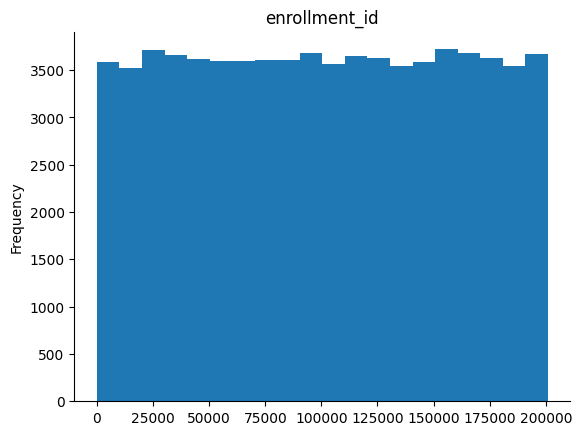

In [11]:
from matplotlib import pyplot as plt
enrollment_train['enrollment_id'].plot(kind='hist', bins=20, title='enrollment_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
log_train

,enrollment_id,time,source,event,object
0,1,2014-06-14T09:38:29,server,navigate,Oj6eQgzrdqBMlaCtaq1IkY6zruSrb71b
1,1,2014-06-14T09:38:39,server,access,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl
2,1,2014-06-14T09:38:39,server,access,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4
3,1,2014-06-14T09:38:48,server,access,2cmZrZW2h6Il91itO3e89FGcABLWhf3W
4,1,2014-06-14T09:41:49,browser,problem,RMtgC2bTAqEeftenUUyia504wsyzeZWf
...,...,...,...,...,...
1311744,21336,2014-01-02T23:04:48,server,navigate,Oj6eQgzrdqBMlaCtaq1IkY6zruSrb71b
1311745,21336,2014-01-02T23:05:24,server,navigate,Oj6eQgzrdqBMlaCtaq1IkY6zruSrb71b
1311746,21336,2014-01-02T23:06:10,server,navigate,Oj6eQgzrdqBMlaCtaq1IkY6zruSrb71b
1311747,21336,2014-01-02T23:06:27,server,access,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl


In [6]:
truth_train

,enrollment_id,dropout
0,1,0
1,4,0
2,5,0
3,7,1
4,13,0
...,...,...
72390,200888,1
72391,200895,1
72392,200897,1
72393,200901,1


In [7]:
FeatureVectorWithLabel = pd.read_csv('FeatureVectorWithLabel.csv')

In [8]:
FeatureVectorWithLabel

,enrollment_id,label,avg_chapter_delays,server_discussion_percent,act_cnt_weekDay_01,browser_html_percent,parallel_enrollments,browser_dictation,act_cnt_day_00,act_cnt_day_01,...,server_course_percent,browser_course_info_percent,browser_course,browser_vertical_percent,sessions_in_week_1,sessions_in_week_0,sessions_in_week_3,sessions_in_week_2,sessions_in_week_4,browser_about
0,1,0,0.161290,0,21,0,4,0,0,0,...,0,0,0,0,5,1,4,6,2,0
1,135300,1,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,131075,1,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0,0.250000,0,7,0,1,0,0,0,...,0,0,0,0,4,4,0,5,0,0
4,5,0,0.166667,0,77,0,0,0,0,2,...,0,0,0,0,16,2,13,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72390,196606,1,0.000000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72391,131065,1,0.000000,0,40,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
72392,178945,1,0.000000,0,37,0,0,0,0,37,...,0,0,0,0,0,1,0,0,0,0
72393,131070,1,1.000000,0,60,0,1,0,0,125,...,0,0,0,0,5,4,0,0,0,0


In [9]:
KDD = pd.read_csv('KDD.csv')

In [10]:
KDD

,enrollment_id,label,server:problem:UNKNOWN,INTERCEPT,browser:problem:problem,browser:video:video,server:discussion:UNKNOWN,server:navigate:UNKNOWN,browser:page_close:UNKNOWN,server:access:sequential,server:access:UNKNOWN,server:problem:problem,browser:problem:UNKNOWN,server:wiki:UNKNOWN,browser:access:UNKNOWN,browser:problem:combinedopenended,browser:access:sequential,browser:video:UNKNOWN,server:access:chapter
0,131073,1.0,0.0,0.0,0.0,1.0,3.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
1,6,0.0,0.0,2.0,0.0,0.0,2.0,9.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
2,131080,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,9,1.0,0.0,3.0,3.0,0.0,6.0,44.0,0.0,0.0,10.0,12.0,0.0,0.0,1.0,11.0,6.0,0.0,2.0
4,131083,1.0,0.0,38.0,20.0,1.0,38.0,88.0,0.0,0.0,13.0,24.0,1.0,1.0,1.0,13.0,37.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72137,131066,1.0,0.0,0.0,0.0,4.0,11.0,12.0,0.0,0.0,6.0,24.0,0.0,2.0,1.0,5.0,2.0,0.0,4.0
72138,131067,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
72139,174762,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
72140,131070,1.0,0.0,35.0,13.0,23.0,36.0,28.0,0.0,0.0,14.0,19.0,0.0,1.0,1.0,13.0,39.0,7.0,18.0


In [13]:
date

,course_id,from,to
0,bWdj2GDclj5ofokWjzoa5jAwMkxCykd6,2014-05-26,2014-06-24
1,RXDvfPUBYFlVdlueBFbLW0mhhAyGEqpt,2014-05-25,2014-06-23
2,fbPkOYLVPtPgIt0MxizjfFJov3JbHyAi,2014-01-17,2014-02-15
3,A3fsA9Zfv1X2fVEQhTw51lKENdNrEqT3,2014-05-28,2014-06-26
4,5X6FeZozNMgE2VRi3MJYjkkFK8SETtu2,2014-06-09,2014-07-08
5,5Gyp41oLVo7Gg7vF4vpmggWP5MU70QO6,2013-12-11,2014-01-09
6,SpATywNh6bZuzm8s1ceuBUnMUAeoAHHw,2014-05-26,2014-06-24
7,3VkHkmOtom3jM2wCu94xgzzu1d6Dn7or,2013-11-01,2013-11-30
8,G8EPVSXsOYB5YQWZGiz1aVq5Pgr2GrQu,2014-05-25,2014-06-23
9,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,2014-06-19,2014-07-18


merged

In [14]:
merged_df = enrollment_train.merge(log_train, on="enrollment_id", how="left")
merged_df = merged_df.merge(date, on="course_id", how="left")
merged_df = merged_df.merge(truth_train, on="enrollment_id", how="left")

In [15]:
merged_df

,enrollment_id,username,course_id,time,source,event,object,from,to,dropout
0,1,9Uee7oEuuMmgPx2IzPfFkWgkHZyPbWr0,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,2014-06-14T09:38:29,server,navigate,Oj6eQgzrdqBMlaCtaq1IkY6zruSrb71b,2014-06-12,2014-07-11,0
1,1,9Uee7oEuuMmgPx2IzPfFkWgkHZyPbWr0,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,2014-06-14T09:38:39,server,access,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl,2014-06-12,2014-07-11,0
2,1,9Uee7oEuuMmgPx2IzPfFkWgkHZyPbWr0,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,2014-06-14T09:38:39,server,access,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4,2014-06-12,2014-07-11,0
3,1,9Uee7oEuuMmgPx2IzPfFkWgkHZyPbWr0,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,2014-06-14T09:38:48,server,access,2cmZrZW2h6Il91itO3e89FGcABLWhf3W,2014-06-12,2014-07-11,0
4,1,9Uee7oEuuMmgPx2IzPfFkWgkHZyPbWr0,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,2014-06-14T09:41:49,browser,problem,RMtgC2bTAqEeftenUUyia504wsyzeZWf,2014-06-12,2014-07-11,0
...,...,...,...,...,...,...,...,...,...,...
4880376,200901,PPEydg4GXh52QanXuUYKbv8ENUSViBbd,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J,2014-07-24T14:11:31,server,access,K72vZ1whXNxqhn8SOx0yShqDfapy40f0,2014-07-03,2014-08-01,1
4880377,200901,PPEydg4GXh52QanXuUYKbv8ENUSViBbd,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J,2014-07-24T14:11:31,browser,page_close,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl,2014-07-03,2014-08-01,1
4880378,200901,PPEydg4GXh52QanXuUYKbv8ENUSViBbd,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J,2014-07-24T14:11:32,browser,video,HdMvr3A6vQzym6Xl0tOXpNbfHOyohlKE,2014-07-03,2014-08-01,1
4880379,200901,PPEydg4GXh52QanXuUYKbv8ENUSViBbd,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J,2014-07-24T14:11:41,browser,page_close,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl,2014-07-03,2014-08-01,1


In [16]:
merged_df.to_csv('KDD_merged.csv', index=False)

In [17]:
# Convert time columns to datetime
merged_df['time'] = pd.to_datetime(merged_df['time'])
merged_df['from'] = pd.to_datetime(merged_df['from'])
merged_df['to'] = pd.to_datetime(merged_df['to'])

In [18]:
# Create features
merged_df['duration'] = (merged_df['to'] - merged_df['from']).dt.total_seconds() / (24 * 60 * 60)
merged_df['days_active'] = (merged_df['time'] - merged_df['from']).dt.total_seconds() / (24 * 60 * 60)

In [21]:
merged_df['duration']

,duration
0,29.0
1,29.0
2,29.0
3,29.0
4,29.0
...,...
4880376,29.0
4880377,29.0
4880378,29.0
4880379,29.0


In [22]:
merged_df['days_active']

,days_active
0,2.401725
1,2.401840
2,2.401840
3,2.401944
4,2.404039
...,...
4880376,21.591331
4880377,21.591331
4880378,21.591343
4880379,21.591447
